In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Specifiy the scale factor for the application
os.environ['QT_AUTO_SCREEN_SCALE_FACTOR'] = '1'
os.environ['QT_SCREEN_SCALE_FACTORS'] = '1'
os.environ['QT_SCALE_FACTOR'] = '1'

# Add data from csv to a dataframe
df = pd.read_csv('C:/Users/asus/Desktop/TBC/Visualization for Data Analytics/Assessment/Assessment 2 [Data Visualization]/data_visualizations/DataSet/combined_weather_and_air_quality_data.csv')

In [28]:
df['Time'] = pd.to_datetime(df['Time'])

# Filter the DataFrame for yearly from 2020 to 2024
df_2019 = df[df['Time'].dt.year == 2019]
df_2020 = df[df['Time'].dt.year == 2020]
df_2021 = df[df['Time'].dt.year == 2021]
df_2022 = df[df['Time'].dt.year == 2022]
df_2023 = df[df['Time'].dt.year == 2023]
df_2024 = df[df['Time'].dt.year == 2024]

# Filter the dataframe for a period of 5 years
df_subset = df[(df['Time'].dt.year >= 2019) & (df['Time'].dt.year < 2023)]

<Figure size 640x480 with 0 Axes>

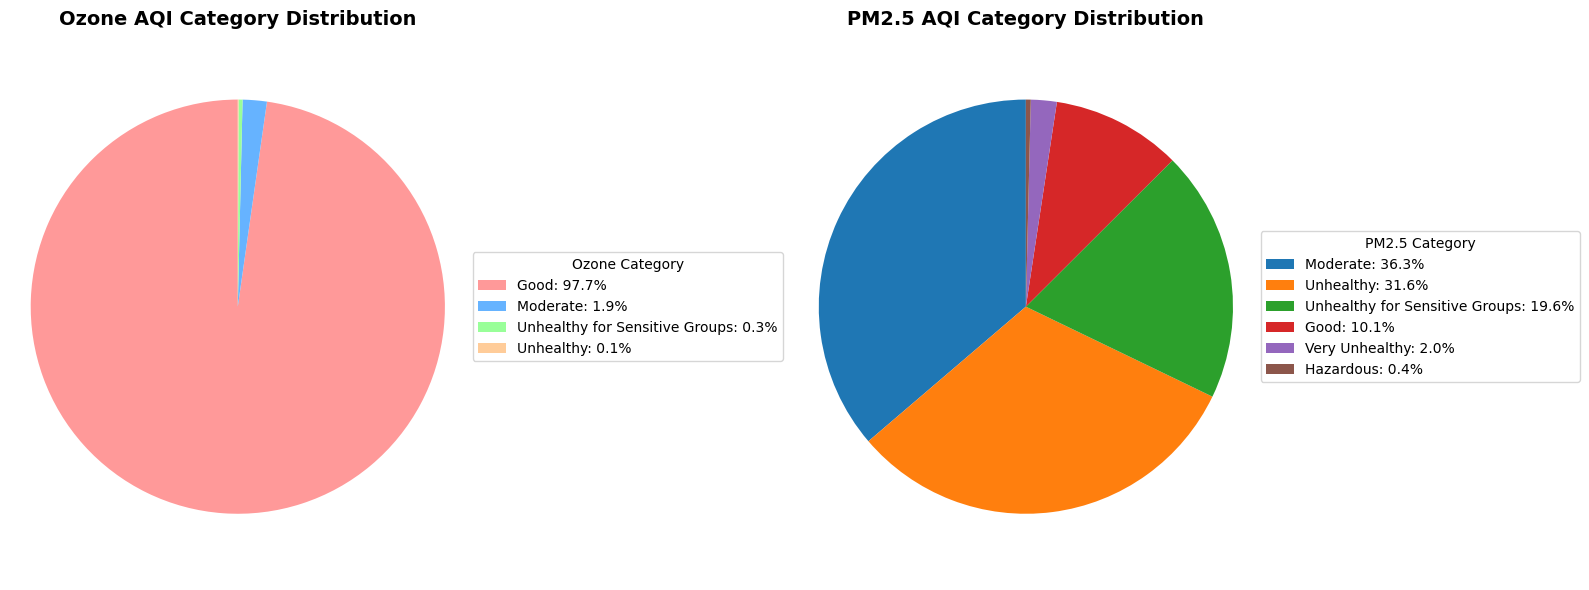

In [8]:
#1 Comparison of Ozone AQI Category and PM2.5 AQI Category 
import matplotlib.cm as cm

# Main heading
plt.suptitle('Ozone and PM2.5 AQI Category Distribution Of Last Five Years', fontsize=16, fontweight='bold')

plt.figure(figsize=(16, 6))

# Plotting the pie chart for Ozone AQI Category
plt.subplot(1, 2, 1)
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Custom colors for the pie chart
ozone_distribution = df_subset['Ozone AQI Category'].value_counts(normalize=True) * 100
plt.pie(ozone_distribution, colors=colors, startangle=90, pctdistance=0.85)
plt.title('Ozone AQI Category Distribution', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adding labels with percentages outside the pie chart
ozone_labels = ozone_distribution.index
ozone_percentages = [f"{ozone}: {percentage:.1f}%" for ozone, percentage in zip(ozone_labels, ozone_distribution)]
plt.legend(ozone_percentages, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), title="Ozone Category")
plt.subplots_adjust(left=0.0, right=0.6)

# Plotting the pie chart for PM2.5 AQI Category
plt.subplot(1, 2, 2)

# Determining the unique categories
num_categories = len(df_subset['PM2.5 AQI Category'].unique())

# Since there are not enough unique colors.
colors = cm.tab10.colors[:num_categories]

pm25_distribution = df_subset['PM2.5 AQI Category'].value_counts(normalize=True) * 100
plt.pie(pm25_distribution, colors=colors, startangle=90, pctdistance=0.85)
plt.title('PM2.5 AQI Category Distribution', fontsize=14, fontweight='bold')
plt.axis('equal') 

# Adding labels with percentages outside the pie chart
pm25_labels = pm25_distribution.index
pm25_percentages = [f"{pm25}: {percentage:.1f}%" for pm25, percentage in zip(pm25_labels, pm25_distribution)]
plt.legend(pm25_percentages, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), title="PM2.5 Category")
plt.subplots_adjust(left=0.0, right=0.6)

plt.tight_layout()
plt.show()


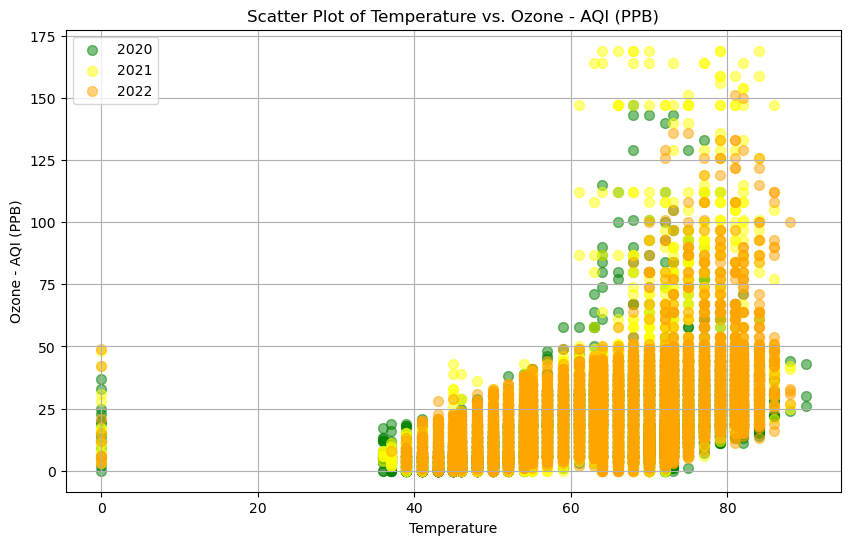

In [11]:
#2 RELATIONSHIP BETWEEN TEMPERATURE AND OZONE AQI
plt.figure(figsize=(10, 6))

x_variable = 'Temperature'
y_variable = 'Ozone - AQI (PPB)'

# Plot scatter plot
plt.scatter(df_2020[x_variable], df_2020[y_variable], alpha=0.5,  color='green', label='2020', s=50)
plt.scatter(df_2021[x_variable], df_2021[y_variable], alpha=0.5, color='yellow', label='2021', s=50)
plt.scatter(df_2022[x_variable], df_2022[y_variable], alpha=0.5,  color='orange', label='2022', s=50)

# Add labels and title
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title('Scatter Plot of Temperature vs. Ozone - AQI (PPB)')
plt.legend()
plt.grid(True)

plt.show()

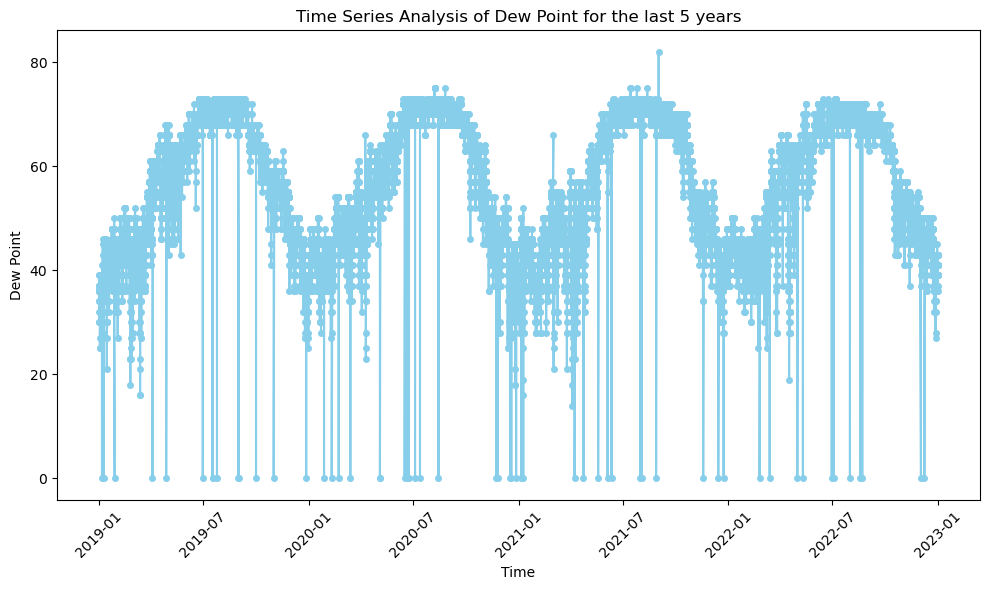

In [33]:
# #3 TIME SERIES ANALYSIS OF DEW POINTS
plt.figure(figsize=(10, 6))

# Plotting the data
plt.plot(df_subset['Time'], df_subset['Dew Point'], color='skyblue', marker='o', markersize=4)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Dew Point')
plt.title('Time Series Analysis of Dew Point for the last 5 years')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


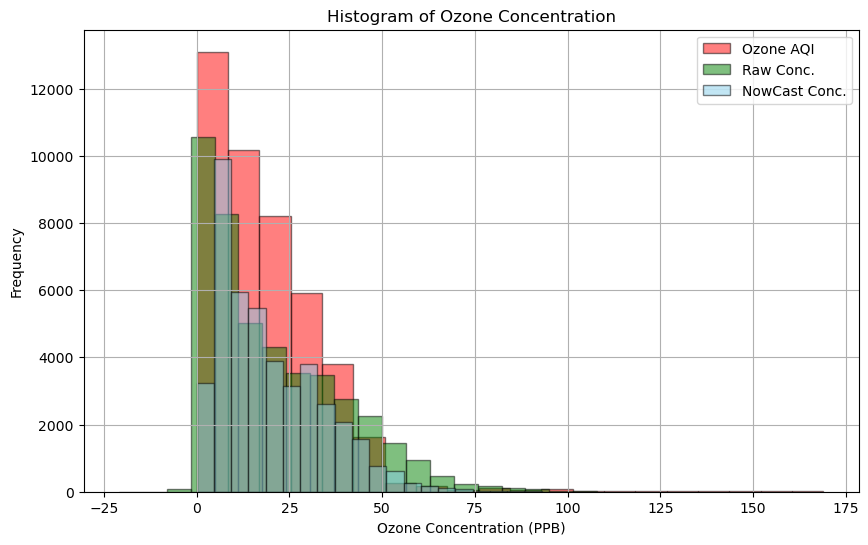

In [97]:

#4. Histogram
plt.figure(figsize=(10, 6))

# Ploting histograms for each variable
plt.hist(df_subset['Ozone - AQI (PPB)'], bins=20, color='red', edgecolor='black', alpha=0.5, label='Ozone AQI')
plt.hist(df_subset['Ozone - Raw Conc. (PPB)'], bins=20, color='green', edgecolor='black', alpha=0.5, label='Raw Conc.')
plt.hist(df_subset['Ozone - NowCast Conc. (PPB)'], bins=20, color='skyblue', edgecolor='black', alpha=0.5, label='NowCast Conc.')

# Add labels and title
plt.xlabel('Ozone Concentration (PPB)')
plt.ylabel('Frequency')
plt.title('Histogram of Ozone Concentration')
plt.legend()

plt.grid(True)
plt.show()
